# A/B Testing

## Bicycle Project 

In [16]:
#Project
#Project Goal
#The project entailed donating bicycles to students in selected high schools in Kisumu County,Kenya.The goal was to reduce the time the students spent to and from school and instead invest the time saved on studies.

#Hypothesis
#H0: Bicycle distribution and usage by students does not significantly affects academic performance.
#H1: Bicycle distribution and usage by students significantly affects academic performance.

In [17]:
# Importing the  libraries
import numpy as np
import pandas as pd

In [18]:
#Importing the data 
df = pd.read_csv('ab_bicycles.csv')

In [19]:
#Exploring the data,checking the first five cases 
df.head()

,studentId,group,selection,performance_improved
0,1,control,nobicycle,0
1,2,treatment,bicycle,1
2,3,treatment,bicycle,1
3,4,treatment,bicycle,1
4,5,control,nobicycle,0


In [20]:
#Exploring the data,checking the shape
df.shape

(684, 4)

In [23]:
# Exploring data consistency 
df.groupby(['group','selection']).count()

,,studentId,performance_improved
group,selection,,
control,nobicycle,342,342
treatment,bicycle,342,342


In [24]:
#Exploring the data further through visualization 
#Importing the library 
import matplotlib.pyplot as plt

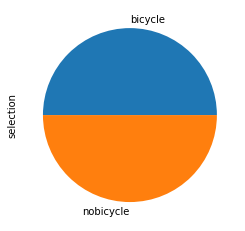

In [26]:
#Visualizing the distribution between the bicycle usere versus non-bicycle users
df['selection'].value_counts().plot.pie()

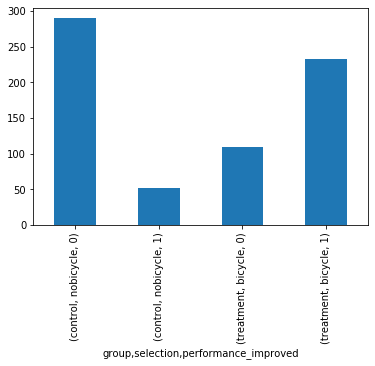

In [27]:
#Visualizing group,selection and performance features
groups = df.groupby(['group','selection','performance_improved']).size()
groups.plot.bar()

## APPROACH A

In [28]:
#df['group']=df.group_treatment.map({'control':0,'treatment':1})
#df['selection']=df.selection_bicycle.map({'nobicycle':0,'bicycle':1})
#df['performace']=df.performance_improved.map({'notimproved':0,'improved':1})

In [29]:
df.head()

,studentId,group,selection,performance_improved
0,1,control,nobicycle,0
1,2,treatment,bicycle,1
2,3,treatment,bicycle,1
3,4,treatment,bicycle,1
4,5,control,nobicycle,0


In [32]:
# Creating a 2x2 table from the data for purposes of  Chi-Square analysis

# 1) Split groups into two separate DataFrames
a = df[df['group'] == 'control']
b = df[df['group'] == 'treatment']

# 2) A-bicycle, A-nobicycle, B-bicycle, B-nobicycle
a_bicycle = a.performance_improved.sum()
a_nobicycle = a.performance_improved.size - b.performance_improved.sum()
b_bicycle = b.performance_improved.sum()
b_nobicycle = b.performance_improved.size - b.performance_improved.sum()

# 3) Create np array
T = np.array([[a_bicycle, a_nobicycle], [b_bicycle, b_nobicycle]])

In [33]:
#Importing the libraries 
import scipy
from scipy import stats
#Performing Chi-square analysis
print(scipy.stats.chi2_contingency(T,correction=False)[1])

3.876845455933384e-14


In [34]:
#The p-value shows that bicycle distribution and usage by students significantly affects academic performance.
#Therefore,we reject the null hypothesis that bicycles distribution and usage by students does not significantly affects academic performance.

In [50]:
#Checking the probability of conversion in the control and treatment groups respectively 
a_receiving_bicycle = a_bicycle/ (a_bicycle + a_nobicycle)
b_receiving_bicycle = a_bicycle / (a_bicycle + a_nobicycle)
print(a_receiving_bicycle, b_receiving_bicycle)

0.32298136645962733 0.32298136645962733


In [37]:
# Prob of improvement regardless of the bicycle
(df.query('performance_improved== 1').performance_improved.count())/df.shape[0]

0.4166666666666667

In [38]:
# Prob of improvement in control group
control_df = df.query('group =="control"')
nobicycle = control_df['performance_improved'].mean()
nobicycle

0.15204678362573099

In [39]:
# Prob of improvement in treatment group
treatment_df = df.query('group =="treatment"')
bicycle = treatment_df['performance_improved'].mean()
bicycle

0.6812865497076024

In [41]:
# Prob of receiving a bicycle
df.query('selection == "bicycle"').selection.count()/df.shape[0]

0.5

## APPROACH B

In [45]:
#Regression Approach, we will now perform the test using logistic regression analysis   
df['ab_bicycle'] = pd.get_dummies(df['group']) ['treatment']

In [46]:
#Importing the library 
import statsmodels.api as sm

In [47]:
#We now fit the model and print out the summary,in this case we are thinking of the conversion as the outcome and the feature being the ab_page 
df['intercept'] = 1
logit_mod = sm.Logit(df['performance_improved'],df[['intercept', 'ab_bicycle']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.526069
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     performance_improved   No. Observations:                  684
Model:                            Logit   Df Residuals:                      682
Method:                             MLE   Df Model:                            1
Date:                  Thu, 14 Jan 2021   Pseudo R-squ.:                  0.2254
Time:                          12:01:15   Log-Likelihood:                -359.83
converged:                         True   LL-Null:                       -464.57
Covariance Type:              nonrobust   LLR p-value:                 1.790e-47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.7186      0.151    -11.412      0.000      -2.014      -1.423
ab_bicycle     2.4783      0.190     13.036      0.000       2.106       2.851
==============================================================================
"""

In [ ]:
#The p-value shows that bicycle distribution and usage by students significantly affects academic performance.
#Therefore,we reject the null hypothesis that bicycles distribution and usage by students does not significantly affects academic performance.

In [48]:
#Checking the exponentials
np.exp(results.params)

intercept      0.179310
ab_bicycle    11.921313
dtype: float64

In [49]:
#Checking the logs
1/_

intercept     5.576923
ab_bicycle    0.083883
dtype: float64

In [ ]:
#Conclusion 
#A student who had and used a bicycle to and from  school was 11.9 times more likely to have improved exams scores compared to one who neither had nor used a bicycle to and from school.